<a href="https://colab.research.google.com/github/Fructum1/Project/blob/main/Pet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import library


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier
import sklearn.preprocessing as prepro
from IPython.display import display

#Import Data

In [159]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)
names = ["ID number", "RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]
data.columns = names
data = data.drop(columns=['ID number'])
print(data)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type of glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0              7

[214 rows x 10 columns]


In [160]:

data['Type of glass'].replace(
    {
        1: "building_windows_float_processed",
        2: "building_windows_non_float_processed",
        3: "vehicle_windows_float_processed",
        4: "vehicle_windows_non_float_processed",
        5: "containers",
        6: "tableware",
        7: "headlamps"
    }, inplace=True
)

In [161]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col] = np.nan
print(data)

          RI     Na    Mg  ...    Ba   Fe                     Type of glass
0    1.52101  13.64  4.49  ...  0.00  0.0  building_windows_float_processed
1    1.51761  13.89  3.60  ...  0.00  0.0  building_windows_float_processed
2    1.51618  13.53  3.55  ...  0.00  0.0  building_windows_float_processed
3    1.51766  13.21   NaN  ...  0.00  0.0  building_windows_float_processed
4    1.51742  13.27  3.62  ...  0.00  0.0  building_windows_float_processed
..       ...    ...   ...  ...   ...  ...                               ...
209  1.51623  14.14  0.00  ...  1.06  0.0                               NaN
210  1.51685  14.92  0.00  ...  1.59  0.0                         headlamps
211  1.52065  14.36  0.00  ...  1.64  0.0                         headlamps
212      NaN  14.38  0.00  ...  1.57  0.0                         headlamps
213  1.51711  14.23  0.00  ...  1.67  0.0                         headlamps

[214 rows x 10 columns]


#Data description

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             197 non-null    float64
 1   Na             195 non-null    float64
 2   Mg             199 non-null    float64
 3   Al             199 non-null    float64
 4   Si             201 non-null    float64
 5   K              201 non-null    float64
 6   Ca             197 non-null    float64
 7   Ba             203 non-null    float64
 8   Fe             195 non-null    float64
 9   Type of glass  201 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [163]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,197.000000,195.000000,199.000000,199.000000,201.000000,201.000000,197.000000,203.000000,195.000000
mean,1.518369,13.404974,2.693869,1.430653,72.669403,0.481841,8.983452,0.168424,0.058872
std,0.003095,0.825548,1.443380,0.485535,0.777200,0.653991,1.467330,0.489762,0.098780
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516530,12.885000,2.140000,1.190000,72.280000,0.110000,8.240000,0.000000,0.000000
50%,1.517680,13.310000,3.480000,1.350000,72.810000,0.550000,8.620000,0.000000,0.000000
75%,1.519110,13.805000,3.605000,1.620000,73.100000,0.610000,9.230000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [164]:
for col in data.columns:
    fr = np.random.randint(5,10)/100
    data.loc[data.sample(frac=fr).index, col] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             182 non-null    float64
 1   Na             178 non-null    float64
 2   Mg             183 non-null    float64
 3   Al             187 non-null    float64
 4   Si             182 non-null    float64
 5   K              184 non-null    float64
 6   Ca             185 non-null    float64
 7   Ba             190 non-null    float64
 8   Fe             183 non-null    float64
 9   Type of glass  191 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [165]:
for col in data.columns:
    missing_values_counts = data[col].isna().sum()
    percentage = 100 * missing_values_counts / len(data[col])
    print("Coloumn", col, "contain", missing_values_counts, "NULL values (", percentage, "% )")

Coloumn RI contain 32 NULL values ( 14.953271028037383 % )
Coloumn Na contain 36 NULL values ( 16.822429906542055 % )
Coloumn Mg contain 31 NULL values ( 14.485981308411215 % )
Coloumn Al contain 27 NULL values ( 12.616822429906541 % )
Coloumn Si contain 32 NULL values ( 14.953271028037383 % )
Coloumn K contain 30 NULL values ( 14.018691588785046 % )
Coloumn Ca contain 29 NULL values ( 13.551401869158878 % )
Coloumn Ba contain 24 NULL values ( 11.214953271028037 % )
Coloumn Fe contain 31 NULL values ( 14.485981308411215 % )
Coloumn Type of glass contain 23 NULL values ( 10.74766355140187 % )


#Задание 4 заполнение


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.521010,13.417865,4.490000,1.10,72.659341,0.48837,8.75,0.00,0.0,building_windows_float_processed
1,1.517610,13.890000,3.600000,1.36,72.730000,0.48000,7.83,0.00,0.0,building_windows_float_processed
2,1.516180,13.530000,3.550000,1.54,72.990000,0.39000,7.78,0.00,0.0,building_windows_float_processed
3,1.517660,13.210000,2.664809,1.29,72.610000,0.48837,8.22,0.00,0.0,building_windows_float_processed
4,1.517420,13.270000,3.620000,1.24,73.080000,0.55000,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.88,72.659341,0.08000,9.18,1.06,0.0,NaN
210,1.516850,14.920000,0.000000,1.99,72.659341,0.00000,8.40,1.59,0.0,headlamps
211,1.520650,14.360000,0.000000,2.02,72.659341,0.00000,8.44,1.64,0.0,headlamps
212,1.518431,14.380000,0.000000,1.94,73.610000,0.00000,8.48,1.57,0.0,headlamps


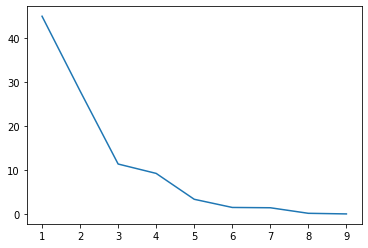

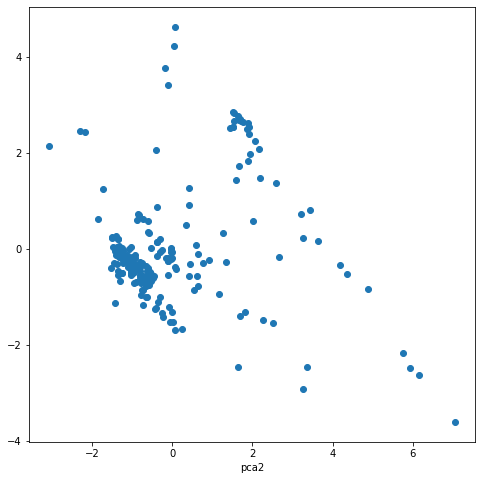

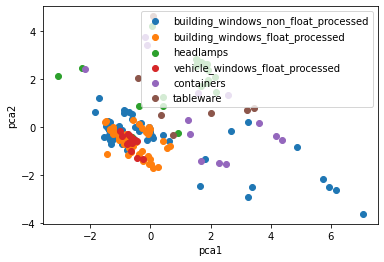

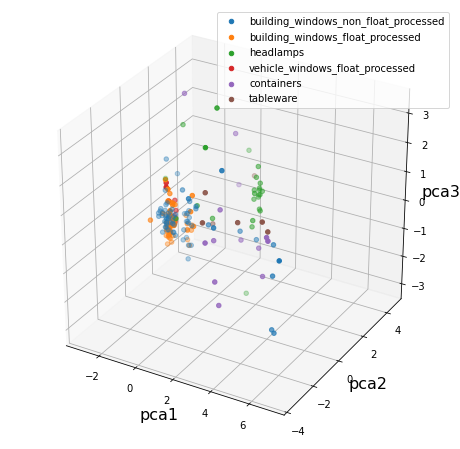

In [166]:
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()


pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Type of glass']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Type of glass']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Type of glass']=data_fillna_mean['Type of glass'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Type of glass'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Type of glass']==glassType],dataPca[col2] [dataPca['Type of glass']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Type of glass'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Type of glass']==glassType],
             dataPca['pca2'] [dataPca['Type of glass']==glassType],
             dataPca['pca3'] [dataPca['Type of glass']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

In [167]:
data.mean()
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()
data_fillna_mean['Type of glass'].value_counts().index[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  191 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


'building_windows_non_float_processed'

In [168]:
data['Type of glass'].mode()

0    building_windows_non_float_processed
dtype: object

In [169]:
data_fillna_mean['Type of glass'].fillna(data_fillna_mean['Type of glass'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [170]:
display(data_fillna_mean)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.521010,13.417865,4.490000,1.10,72.659341,0.48837,8.75,0.00,0.0,building_windows_float_processed
1,1.517610,13.890000,3.600000,1.36,72.730000,0.48000,7.83,0.00,0.0,building_windows_float_processed
2,1.516180,13.530000,3.550000,1.54,72.990000,0.39000,7.78,0.00,0.0,building_windows_float_processed
3,1.517660,13.210000,2.664809,1.29,72.610000,0.48837,8.22,0.00,0.0,building_windows_float_processed
4,1.517420,13.270000,3.620000,1.24,73.080000,0.55000,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.88,72.659341,0.08000,9.18,1.06,0.0,building_windows_non_float_processed
210,1.516850,14.920000,0.000000,1.99,72.659341,0.00000,8.40,1.59,0.0,headlamps
211,1.520650,14.360000,0.000000,2.02,72.659341,0.00000,8.44,1.64,0.0,headlamps
212,1.518431,14.380000,0.000000,1.94,73.610000,0.00000,8.48,1.57,0.0,headlamps


#Visualization 3 Задание


In [172]:
cols = data.columns
cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [173]:
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    if col == "Type of glass":
      ax.bar(data[col].value_counts().index.values, data[col].value_counts().values)
      ax.set_title("Barplot для " + col, fontsize=16)
      ax.tick_params(axis="x", which="major", labelsize=10, rotation = 35)
    else:
      ax.hist(data[col], density = True, bins = 20)
      ax.set_xlabel(col, fontsize=16)
      ax.set_title("Гистограмма для " + col, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [174]:
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    data1 = data[col][~np.isnan(data[col])].copy()
    ax.boxplot(data1, showmeans=True) 
    ax.set_title(f"Ящик с усами, {col}", fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols[:-1]);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [175]:
def showDiagramm(col1, col2):
    fig, ax = plt.subplots(figsize=(10,10))
    for glassType in data['Type of glass'].value_counts().index.values:
      ax.scatter(data[col1][data['Type of glass']==glassType], data[col2][data['Type of glass']==glassType], label=glassType)
    ax.set_xlabel(col1, fontsize=16)
    ax.set_ylabel(col2, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col1=cols[:-1], col2=cols[:-1]);

interactive(children=(Dropdown(description='col1', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe…

#Гистограммы


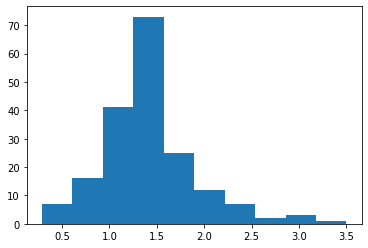

In [176]:
col='Al'
plt.hist(data[col])
plt.show()

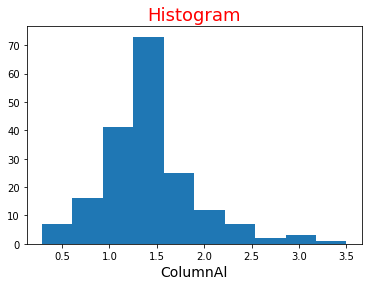

In [177]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col])
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)
plt.show()

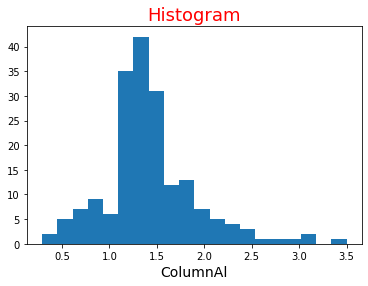

In [178]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col], bins=20)
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)
plt.show()

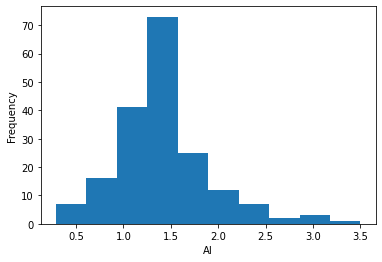

In [179]:
ax= data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

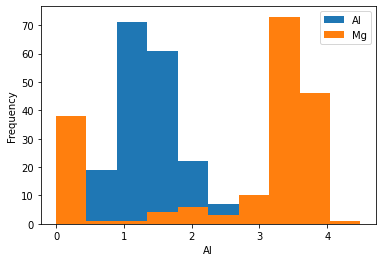

In [180]:
ax= data[['Al','Mg']].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

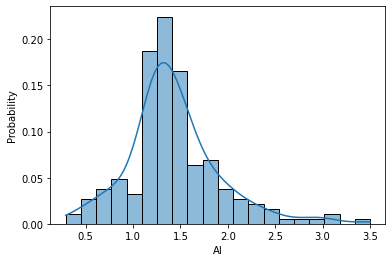

In [181]:
sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

<function matplotlib.pyplot.show>

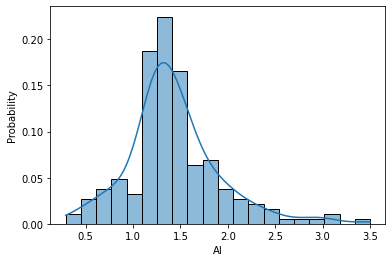

In [182]:
,plt.figure(figsize=(8,3))
ax=sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show

#Bar plot

In [183]:
col='Type of glass'

In [184]:
df1= data[col].value_counts()
df1

building_windows_non_float_processed    69
building_windows_float_processed        62
headlamps                               25
vehicle_windows_float_processed         15
containers                              13
tableware                                7
Name: Type of glass, dtype: int64

In [185]:
df1.index.values

array(['building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'vehicle_windows_float_processed', 'containers', 'tableware'],
      dtype=object)

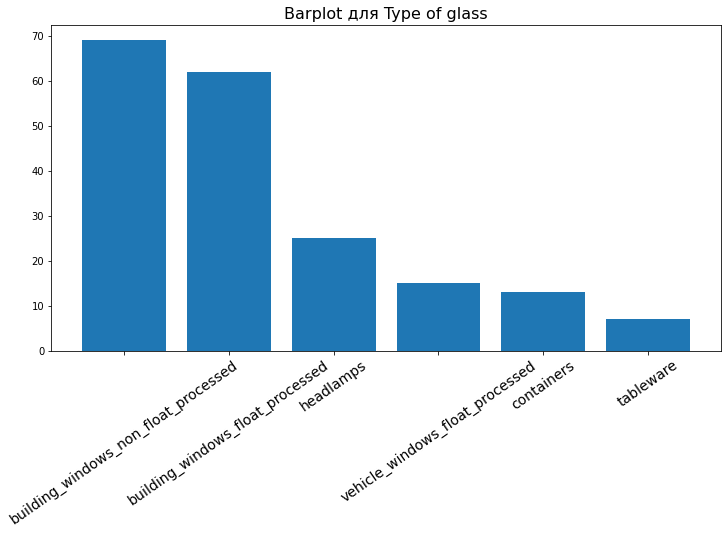

In [186]:
col='Type of glass'

fig,ax =plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values,
       data[col].value_counts().values)
ax.set_xlabel(None,fontsize=16)
ax.set_title('Barplot для '+str(col),fontsize=16)
ax.tick_params(axis='x',which='major',
               labelsize=14,rotation=35)
plt.show()

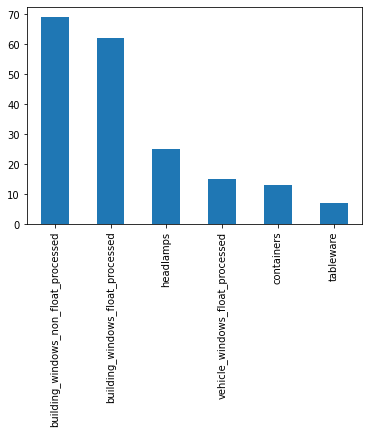

In [187]:
data[col].value_counts().plot(kind='bar')
plt.show()

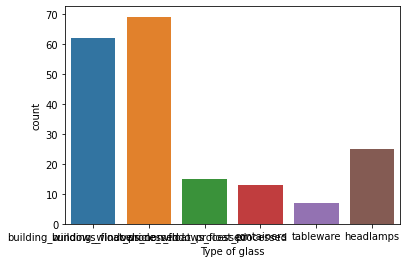

In [188]:
sns.countplot(data=data, x='Type of glass')
plt.show()

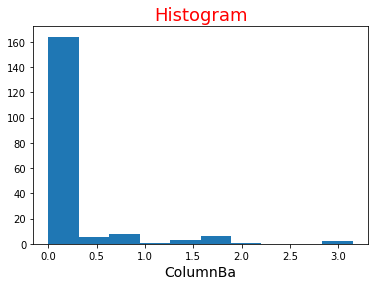

In [189]:
data_x = "Ba" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe","Type of glass"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"
col10="Type of glass"
if data_x == "RI":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col1])
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Na":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col2])
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Mg":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col3])
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Al":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col4])
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Si":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col5])
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "K":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col6])
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Ca":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col7])
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Ba":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col8])
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Fe":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col9])
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Type of glass":
  fig,ax =plt.subplots(figsize=(12,6))
  ax.bar(data[col10].value_counts().index.values,data[col10].value_counts().values)
  ax.set_xlabel(None,fontsize=16)
  ax.set_title('Barplot для '+str(col10),fontsize=16)
  ax.tick_params(axis='x',which='major',labelsize=14,rotation=35)
  plt.show()

#Ящик с усами

<function matplotlib.pyplot.show>

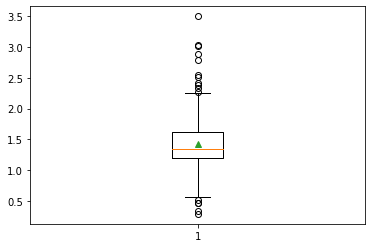

In [190]:
col='Al'
fig, ax=plt.subplots()
ax.boxplot(data[col][~np.isnan(data[col])],showmeans=True)

plt.show

<function matplotlib.pyplot.show>

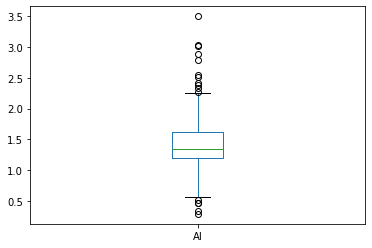

In [191]:
data[col].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

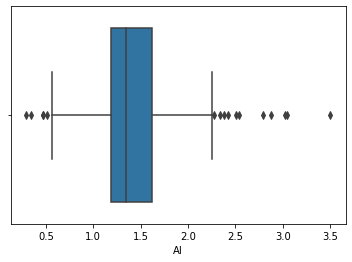

In [192]:
sns.boxplot(data=data,x=col)
plt.show

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

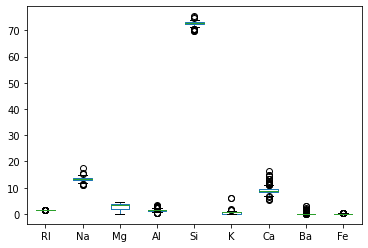

In [193]:
data.plot(kind='box')
plt.show

In [194]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [195]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'], dtype=object)

In [196]:
data.columns.values !='Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [197]:
data.columns.values[data.columns.values !='Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

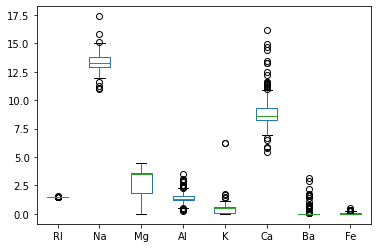

In [198]:
data[data.columns.values[data.columns.values !='Si']].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

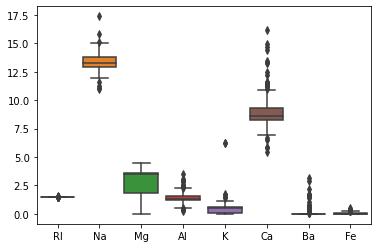

In [199]:
sns.boxplot(data=data[data.columns.values[data.columns.values !='Si']])
plt.show

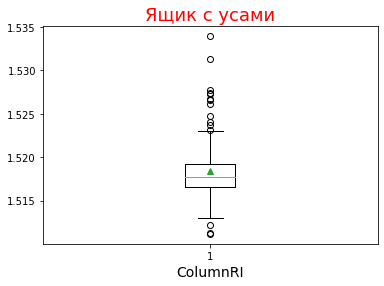

In [200]:
#@markdown -----
#@markdown Задание 3/2
data_y = "RI" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"
if data_y == "RI":
  fig, ax=plt.subplots()
  ax.boxplot(data[col1][~np.isnan(data[col1])],showmeans=True)
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Na":
  fig, ax=plt.subplots()
  ax.boxplot(data[col2][~np.isnan(data[col2])],showmeans=True)
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Mg":
  fig, ax=plt.subplots()
  ax.boxplot(data[col3][~np.isnan(data[col3])],showmeans=True)
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Al":
  fig, ax=plt.subplots()
  ax.boxplot(data[col4][~np.isnan(data[col4])],showmeans=True)
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Si":
  fig, ax=plt.subplots()
  ax.boxplot(data[col5][~np.isnan(data[col5])],showmeans=True)
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "K":
  fig, ax=plt.subplots()
  ax.boxplot(data[col6][~np.isnan(data[col6])],showmeans=True)
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Ca":
  fig, ax=plt.subplots()
  ax.boxplot(data[col7][~np.isnan(data[col7])],showmeans=True)
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Ba":
  fig, ax=plt.subplots()
  ax.boxplot(data[col8][~np.isnan(data[col8])],showmeans=True)
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Fe":
  fig, ax=plt.subplots()
  ax.boxplot(data[col9][~np.isnan(data[col9])],showmeans=True)
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()

#Стандартизация

In [201]:
scaler1=prepro.MinMaxScaler()
datascaler1=scaler1.fit_transform(data[data.columns.values[data.columns.values !='Type of glass']])

datascaler1=pd.DataFrame(datascaler1, columns=data.columns.values[data.columns.values !='Type of glass'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


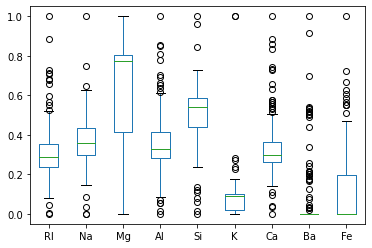

In [202]:
datascaler1.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show>

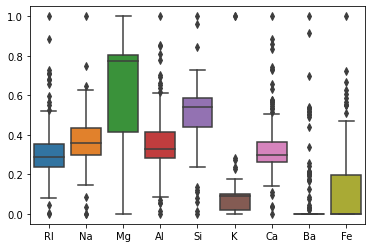

In [203]:
sns.boxplot(data=datascaler1)
plt.show

In [204]:
scaler2=prepro.StandardScaler()
datascaler2=scaler2.fit_transform(data[data.columns.values[data.columns.values !='Type of glass']])

datascaler2=pd.DataFrame(datascaler2, columns=data.columns.values[data.columns.values !='Type of glass'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


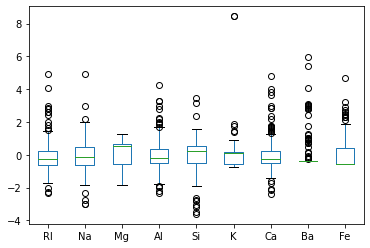

In [205]:
datascaler2.plot(kind='box')
plt.show()

#Pair plot

In [206]:
col1='Mg'
col2='Fe'

<function matplotlib.pyplot.show>

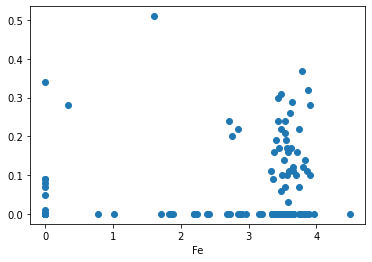

In [207]:
fig, ax =plt.subplots()
ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_xlabel(col2)

plt.show

In [208]:
df1=data['Type of glass'].value_counts()
df1.index.values

array(['building_windows_non_float_processed',
       'building_windows_float_processed', 'headlamps',
       'vehicle_windows_float_processed', 'containers', 'tableware'],
      dtype=object)

<function matplotlib.pyplot.show>

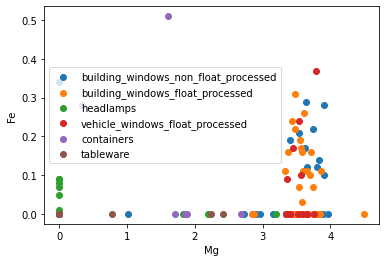

In [209]:
fig, ax = plt.subplots()

for glassType in data['Type of glass'].value_counts().index.values:
  ax.scatter(data[col1][data['Type of glass']==glassType],data[col2] [data['Type of glass']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

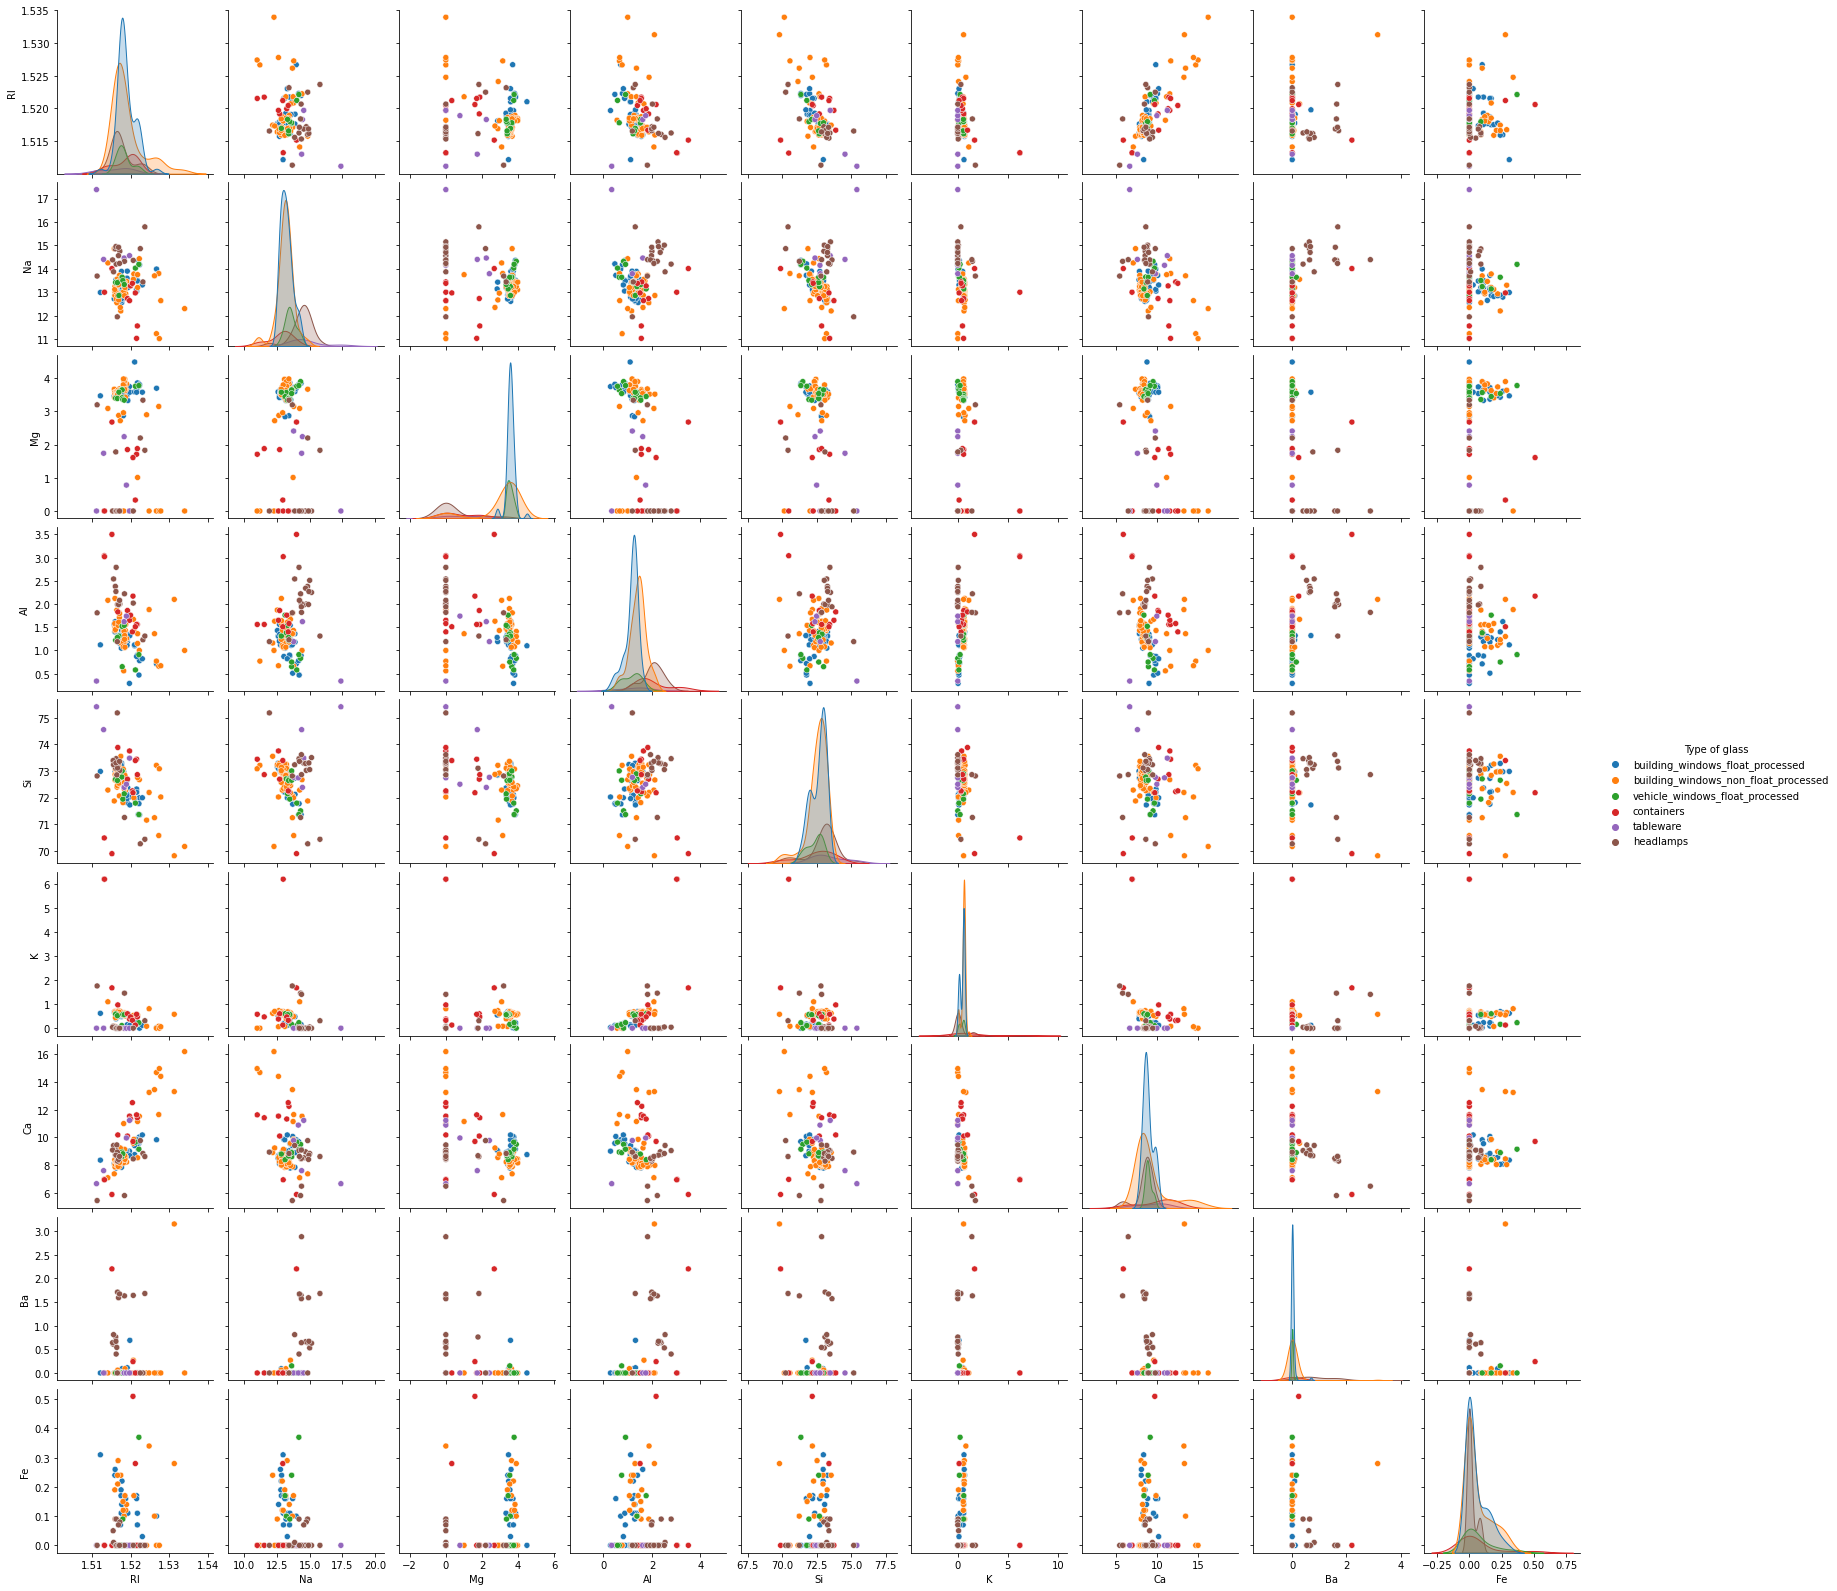

In [210]:
sns.pairplot(data=data, hue='Type of glass')
plt.show


#Data Cov / Heatmap



In [211]:
corr = data.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.168063,-0.061157,-0.358871,-0.557962,-0.309282,0.815430,0.061095,0.105360
Na,-0.168063,1.000000,-0.313874,0.180452,-0.171191,-0.241689,-0.278046,0.515910,-0.145462
Mg,-0.061157,-0.313874,1.000000,-0.509136,-0.243733,0.004081,-0.396391,-0.515137,0.135442
Al,-0.358871,0.180452,-0.509136,1.000000,0.003978,0.398223,-0.257021,0.476912,-0.065503
Si,-0.557962,-0.171191,-0.243733,0.003978,1.000000,-0.238722,-0.244630,-0.186324,-0.055617
K,-0.309282,-0.241689,0.004081,0.398223,-0.238722,1.000000,-0.335965,-0.038119,-0.013016
Ca,0.815430,-0.278046,-0.396391,-0.257021,-0.244630,-0.335965,1.000000,-0.101625,0.070882
Ba,0.061095,0.515910,-0.515137,0.476912,-0.186324,-0.038119,-0.101625,1.000000,-0.039030
Fe,0.105360,-0.145462,0.135442,-0.065503,-0.055617,-0.013016,0.070882,-0.039030,1.000000


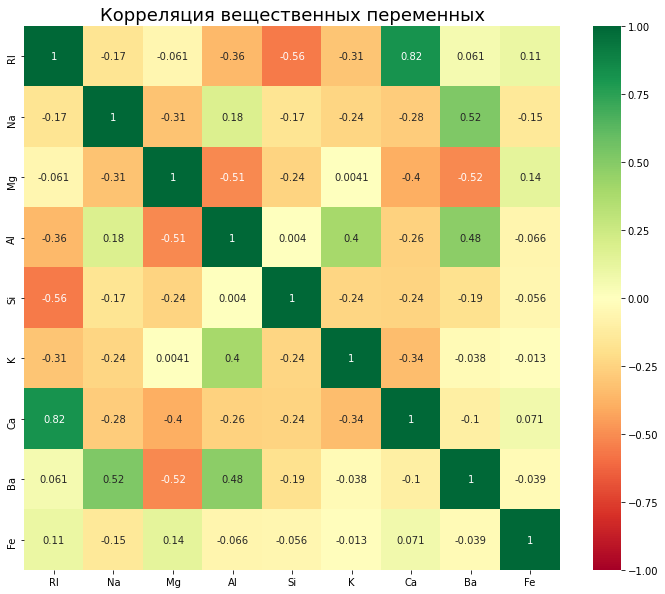

In [212]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr,annot = True, vmax=1, vmin=-1, cmap = 'RdYlGn')
ax.set_title('Корреляция вещественных переменных', fontsize=18)
plt.show()

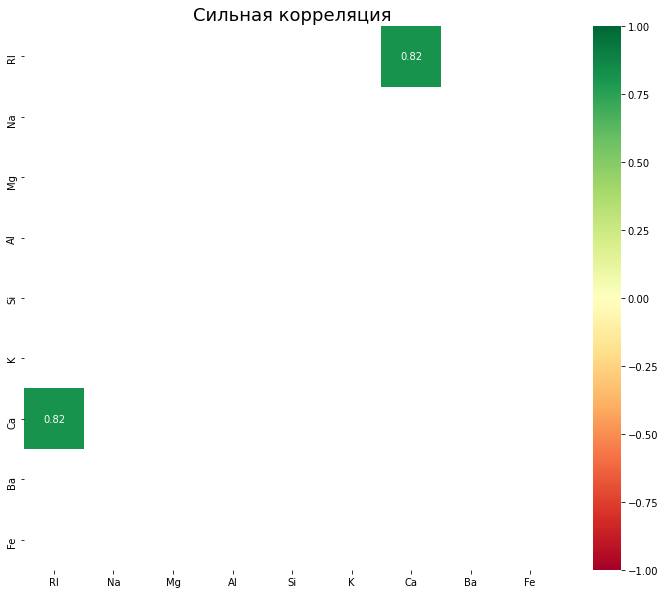

In [213]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr[((corr>=0.75)|(corr<=-0.75))&(corr!=1)],annot = True, vmax=1, vmin=-1, cmap = 'RdYlGn')
ax.set_title('Сильная корреляция', fontsize=18)
plt.show()

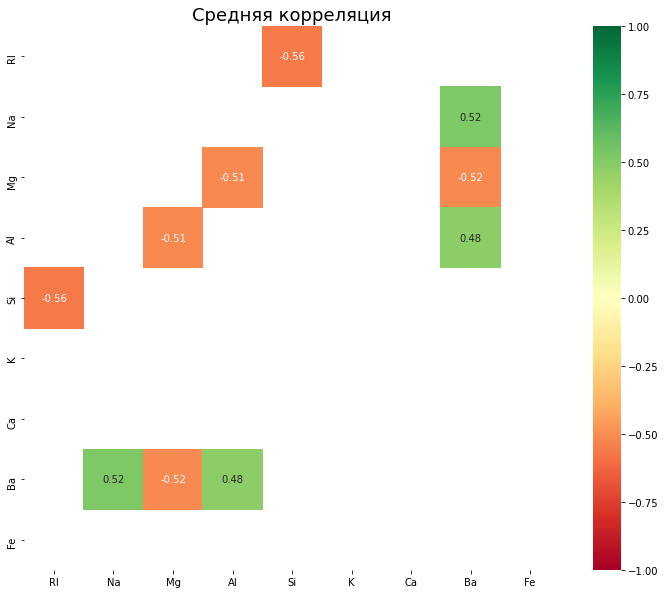

In [214]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr[(corr<=-0.45)&(corr>=-0.75)|(corr>=0.45)&(corr<=0.75)],annot = True, vmax=1, vmin=-1, cmap = 'RdYlGn')
ax.set_title('Средняя корреляция', fontsize=18)
plt.show()

Сильная корреляция (-1, -0.75) и (0.75, 1)

Средняя корреляция (-0.75, -0.45) и (0.45, 0.75)

Слабая корреляция (-0.45, 0.25) и (0.25, 0.45)

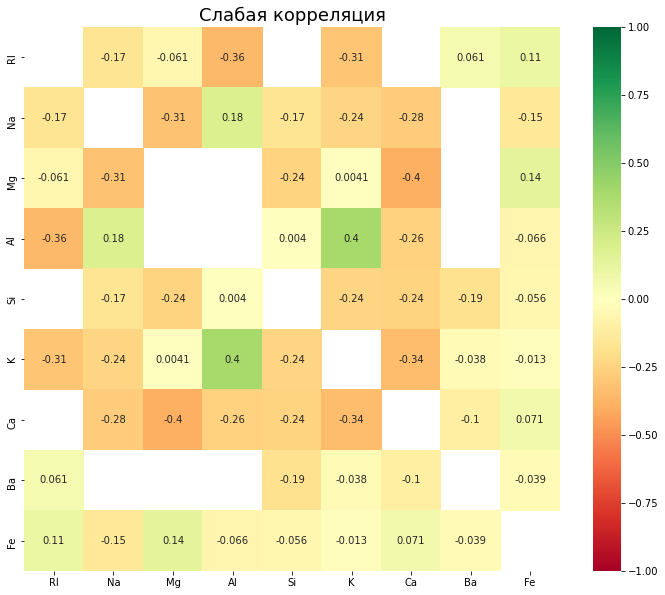

In [215]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr[(corr>=-0.45)&(corr<=0.25)|(corr>=0.25)&(corr<=0.45)],annot = True, vmax=1, vmin=-1, cmap = 'RdYlGn')
ax.set_title('Слабая корреляция', fontsize=18)
plt.show()

#Feature informative


In [216]:
data_fillna_mean['Type of glass'].fillna(data_fillna_mean['Type of glass'].mode()[0], inplace=True)
data_fillna_mean['Type of glass'].mode()[0]
data_fillna_mean.info()
forest = ExtraTreesClassifier(n_estimators=100)

#forest.fit(x,y)
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Type of glass'] ], 
    data_fillna_mean['Type of glass']
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [217]:
importances = forest.feature_importances_
importances

array([0.1262564 , 0.09905364, 0.17337371, 0.13448745, 0.0896064 ,
       0.1194266 , 0.12881779, 0.06533911, 0.06363891])

In [218]:
np.sort(importances)[::-1]

array([0.17337371, 0.13448745, 0.12881779, 0.1262564 , 0.1194266 ,
       0.09905364, 0.0896064 , 0.06533911, 0.06363891])

In [219]:
indies = np.argsort(importances)[::-1]

In [220]:
for f in range(9):
  print('%d. feature %s (%f)'%(f+1,data.columns.values[indies[f]],importances[indies[f]]))

1. feature Mg (0.173374)
2. feature Al (0.134487)
3. feature Ca (0.128818)
4. feature RI (0.126256)
5. feature K (0.119427)
6. feature Na (0.099054)
7. feature Si (0.089606)
8. feature Ba (0.065339)
9. feature Fe (0.063639)


<BarContainer object of 9 artists>

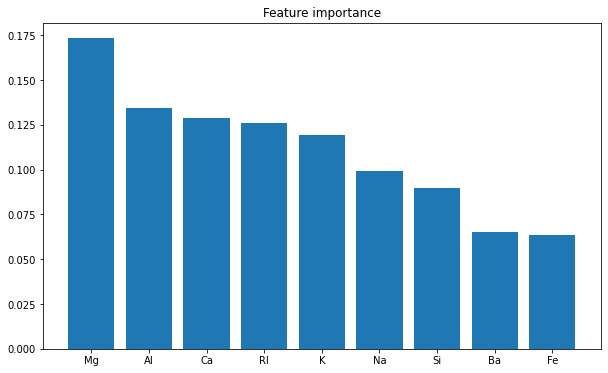

In [221]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Feature importance')
ax.bar(data.columns.values[indies],importances[indies])

<BarContainer object of 9 artists>

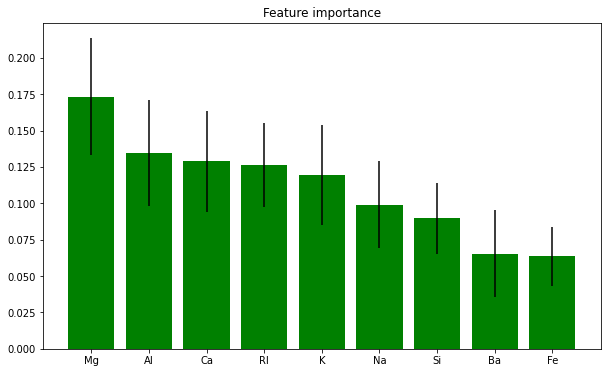

In [222]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Feature importance')
ax.bar(data.columns.values[indies],importances[indies], color='g', yerr = std[indies], align = 'center')